In [3]:
%matplotlib inline
import pandas as pd
import os

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

IOError: [Errno 2] No such file or directory: 'style-table.css'

In [5]:
tar = os.chdir("C:\\Users\\xiyan_wang\\Desktop\\mystuff\\PyCon\\pycon-pandas-tutorial-master\\build\\data")
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
release_dates = pd.DataFrame.from_csv('release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [15]:
r = release_dates
r = r[(r.country == "USA") & (r.title.str.contains('Christmas'))]
r.head()

,title,year,country,date
1182,12 Dog Days of Christmas,2014,USA,2014-11-28
1183,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09
5873,A Belle for Christmas,2014,USA,2014-11-04
6131,A Cadaver Christmas,2011,USA,2011-04-02
6239,A Christmas Blessing,2013,USA,2013-12-07


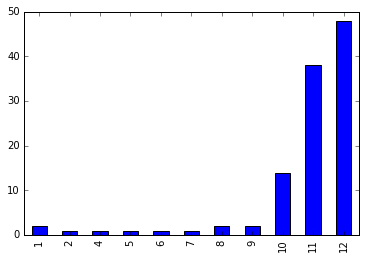

In [16]:
r.date.dt.month.value_counts().sort_index().plot(kind ='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

In [19]:
r = release_dates
r = r[(r.title.str.startswith('The Hobbit')) & (r.country == 'USA')]

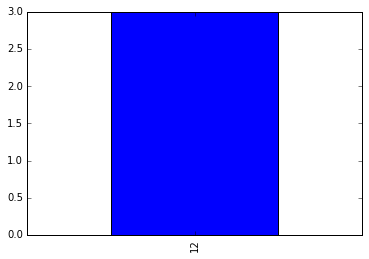

In [21]:
r.date.dt.month.value_counts().sort_index().plot(kind = "bar")

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

In [22]:
r = release_dates
r = r[(r.title.str.contains("Romance")) & (r.country == 'USA')]

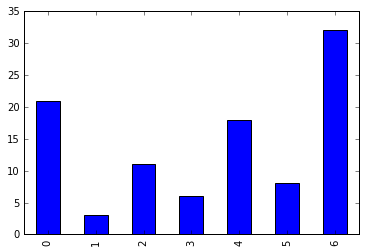

In [25]:
r.date.dt.dayofweek.value_counts().sort_index().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

In [26]:
r = release_dates
r = r[(r.title.str.contains('Action')) & (r.country == "USA")]

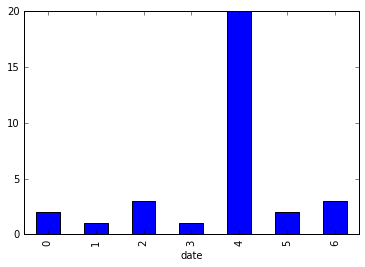

In [31]:
r.groupby(r.date.dt.dayofweek).size().plot(kind = 'bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [36]:
c = cast[(cast.name == "Judi Dench") & (cast.year//10 == 199)]
m = c.merge(release_dates)

In [42]:
m = m[m.country == 'USA'].sort_values(['date'])
m

,title,year,name,type,character,n,country,date
1,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
71,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
40,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
78,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
246,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
101,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
147,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
173,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

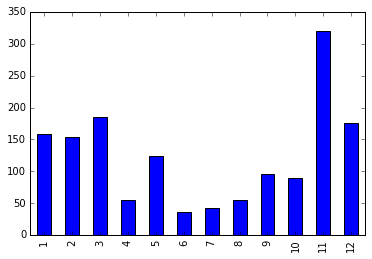

In [49]:
c = cast[(cast.name == 'Judi Dench')]
m = c.merge(release_dates)
m
m.date.dt.month.value_counts().sort_index().plot(kind = 'bar')

### In which months do films with Tom Cruise tend to be released in the USA?

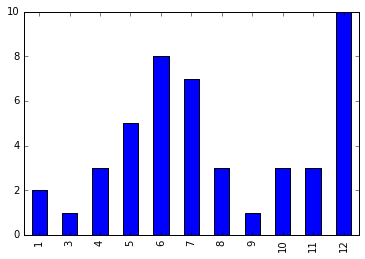

In [52]:
c = cast[cast.name == 'Tom Cruise']
m = c.merge(release_dates)
m = m[m.country == "USA"]
m.date.dt.month.value_counts().sort_index().plot(kind = 'bar')